# 1. Ambiente

In [13]:
import pandas as pd

In [14]:
import numpy as np

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
import yfinance as yf

In [17]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [18]:
from datetime import date, timedelta

In [19]:
import requests

#2. Obtencion de datos

In [20]:
#Utiliza la biblioteca yfinance de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, deberás extraer el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico deberás guardarlo en el dataframe df_bitcoin.

In [21]:
url1 = 'https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD'
ua = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
r = requests.get(url1, headers={'User-Agent': ua})
indices = pd.read_html(r.text)[0]

In [40]:
def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
  df_bitcoin = pd.DataFrame(historico)
  print(df_bitcoin)
bitcoin = 'BTC-USD'
current_date = date.today()
last_date = timedelta(days=7)

historico = yf.download(bitcoin, (current_date - last_date), interval='5m')
df_bitcoin = pd.DataFrame(historico)
df_bitcoin

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-26 00:00:00+00:00,34504.289062,34509.437500,34474.312500,34509.437500,34509.437500,0
2023-10-26 00:05:00+00:00,34521.175781,34521.175781,34474.617188,34505.679688,34505.679688,0
2023-10-26 00:10:00+00:00,34496.804688,34527.507812,34484.953125,34527.507812,34527.507812,317440
2023-10-26 00:15:00+00:00,34533.218750,34543.382812,34524.519531,34543.382812,34543.382812,0
2023-10-26 00:20:00+00:00,34548.535156,34554.820312,34537.343750,34554.820312,34554.820312,0
...,...,...,...,...,...,...
2023-11-02 19:55:00+00:00,34974.011719,35016.367188,34974.011719,35016.367188,35016.367188,32315392
2023-11-02 20:00:00+00:00,34992.746094,35027.097656,34951.164062,34951.164062,34951.164062,3889152
2023-11-02 20:05:00+00:00,34966.433594,35025.285156,34966.433594,35025.285156,35025.285156,6938624


In [ ]:
importar_base_bitcoin()

In [42]:
#Web scraping para obtener el precio actual y extraer tendencias

In [43]:
import requests
res =requests.get('https://coinmarketcap.com/')
global_bitcoin = pd.read_html(res.content)
s=BeautifulSoup(res.content, features= 'lxml')
resp= s.find('div', {'class':[ 'sc-a0353bbc-0 gDrtaY', 'sc-a0353bbc-0 gDrtaY rise', 'sc-a0353bbc-0 gDrtaY fall']}).get_text()
precio_actual= float((resp).replace('$','').replace(',',''))
precio_actual

#tendencia
lista=[]
resp1 = s.findAll('span', {'class':['icon-Caret-down', 'icon-Caret-up']})
for item in resp1:
 lista.append(item)

print(lista[0])
algoritmo_decision= ''
if item(('span')==['class'][0]):
  tendencia = 'baja'
else:
   tendencia = 'alta'

tendencia

<span class="icon-Caret-up"></span>


'alta'

In [45]:
def extraer_tendencias():
  global media_bitcoin, precio_actual, algoritmo_decision, tendencia
  print('Bitcoin Price: ', precio_actual)
  print('Tendencia: ', tendencia)

extraer_tendencias()

Bitcoin Price:  35063.51
Tendencia:  alta


#3. Limpieza de datos

In [47]:
df_bitcoin_limpio = df_bitcoin

                                  Close    Volume
Datetime                                         
2023-10-26 00:00:00+00:00  34509.437500         0
2023-10-26 00:05:00+00:00  34505.679688         0
2023-10-26 00:10:00+00:00  34527.507812    317440
2023-10-26 00:15:00+00:00  34543.382812         0
2023-10-26 00:20:00+00:00  34554.820312         0
...                                 ...       ...
2023-11-02 19:55:00+00:00  35016.367188  32315392
2023-11-02 20:00:00+00:00  34951.164062   3889152
2023-11-02 20:05:00+00:00  35025.285156   6938624
2023-11-02 20:10:00+00:00  35056.894531  52453376
2023-11-02 20:15:00+00:00  35094.617188  18479104

[2256 rows x 2 columns]


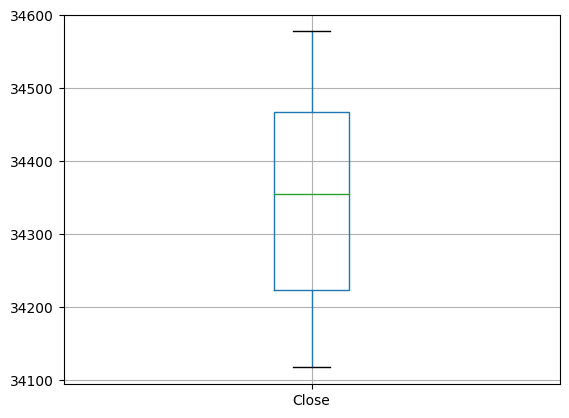

In [65]:
def limpieza_datos():
  df_bitcoin_limpio = df_bitcoin.copy()
  df_bitcoin_limpio [['Close', 'Volume']]
  df_bitcoin_limpio['Datetime'] = df_bitcoin_limpio.index
  df_bitcoin_limpio =df_bitcoin_limpio[['Datetime', 'Close', 'Volume' ]]
  df_bitcoin_limpio = df_bitcoin_limpio.set_index('Datetime')
  df_bitcoin_limpio.drop_duplicates(inplace=True)
  df_bitcoin_limpio[df_bitcoin_limpio['Close'].isnull()]
  df_bitcoin_limpio[df_bitcoin_limpio['Volume'] >= 0]
  df_bitcoin_limpio.boxplot(['Close']) #identificando los outliers
valor = df_bitcoin_limpio['Close']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1- 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
seleccion =  ((valor>= Q1) & (valor<=Q3))
media_bitcoin = df_bitcoin_limpio[seleccion]
media_bitcoin.boxplot(['Close'])

print (df_bitcoin_limpio)

In [66]:
df_bitcoin_limpio.info() #no tengo nulos en mi df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2256 entries, 2023-10-26 00:00:00+00:00 to 2023-11-02 20:15:00+00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2256 non-null   float64
 1   Volume  2256 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 52.9 KB


<Axes: >

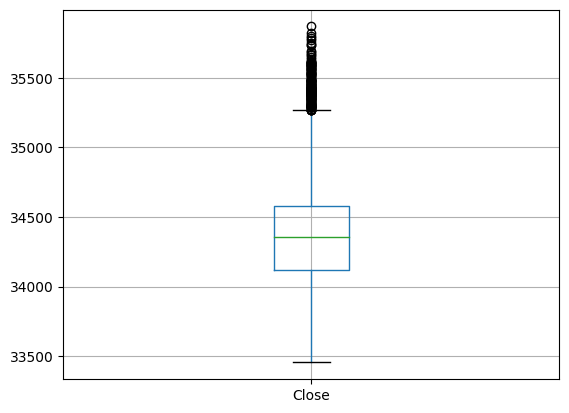

In [67]:
df_bitcoin_limpio.boxplot(['Close']) #identificando los outliers

In [70]:
media_bitcoin =df_bitcoin_limpio['Close'].mean().round(2) #calculo del precio promedio de Close
media_bitcoin

34409.61

#4. Tomar decisiones

In [120]:
def take_decision():
 global  media_bitcoin, precio_actual, algoritmo_decision
 if precio_actual > media_bitcoin:
  tendencia: 'alta'
  algoritmo_decision = 'Vender'
 if precio_actual < media_bitcoin:
  tendencia: 'baja'
  algoritmo_decision = 'Comprar'
 else:
  algoritmo_decision = 'Esperar'
 print('La decision a tomar es:', algoritmo_decision)

In [121]:
take_decision()

La decision a tomar es: Esperar


#5.Visualizacion

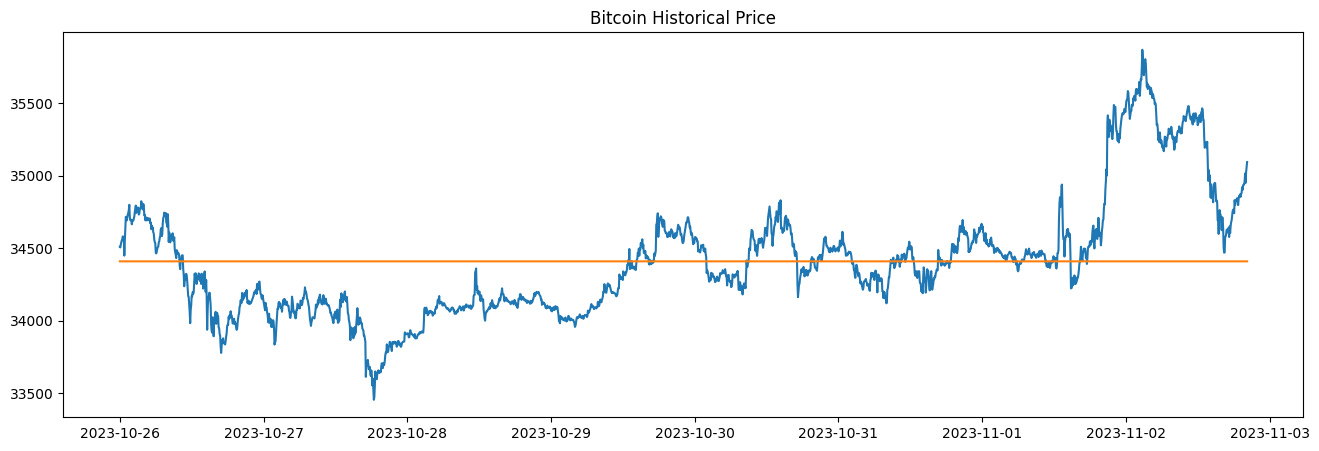

In [105]:
def visualizacion():
 global media_bitcoin, precio_actual, algoritmo_decision, tendencia
 df_bitcoin['Promedio']= media_bitcoin
 area = plt.figure()
 plt.rc('figure', figsize = (16, 5))
 datos_bitcoin = df_bitcoin.Close
 plt.title('Bitcoin Historical Price')
 plt.plot(df_bitcoin.index, df_bitcoin['Close'], label= 'Closing Price')
 plt.plot(df_bitcoin.index, df_bitcoin['Promedio'], label= 'Promedio')
 plt.show()

visualizacion()

# 6. Automatizacion

In [111]:
from IPython.display import clear_output
import time

                                   Open          High           Low  \
Datetime                                                              
2023-10-26 00:00:00+00:00  34504.289062  34509.437500  34474.312500   
2023-10-26 00:05:00+00:00  34521.175781  34521.175781  34474.617188   
2023-10-26 00:10:00+00:00  34496.804688  34527.507812  34484.953125   
2023-10-26 00:15:00+00:00  34533.218750  34543.382812  34524.519531   
2023-10-26 00:20:00+00:00  34548.535156  34554.820312  34537.343750   
...                                 ...           ...           ...   
2023-11-02 19:55:00+00:00  34974.011719  35016.367188  34974.011719   
2023-11-02 20:00:00+00:00  34992.746094  35027.097656  34951.164062   
2023-11-02 20:05:00+00:00  34966.433594  35025.285156  34966.433594   
2023-11-02 20:10:00+00:00  35079.199219  35084.328125  35047.367188   
2023-11-02 20:15:00+00:00  35057.894531  35096.246094  35057.894531   

                                  Close     Adj Close    Volume  Promedio  


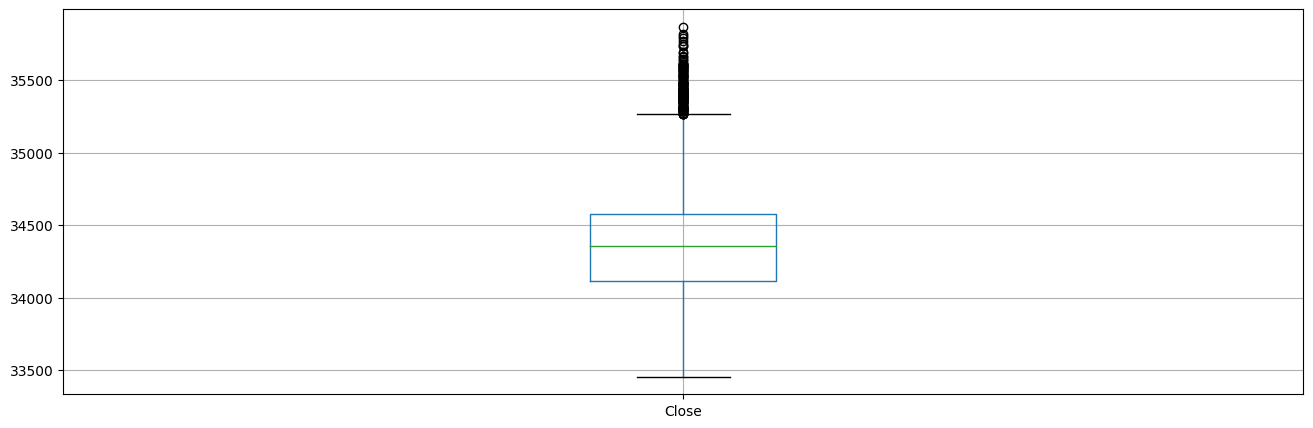

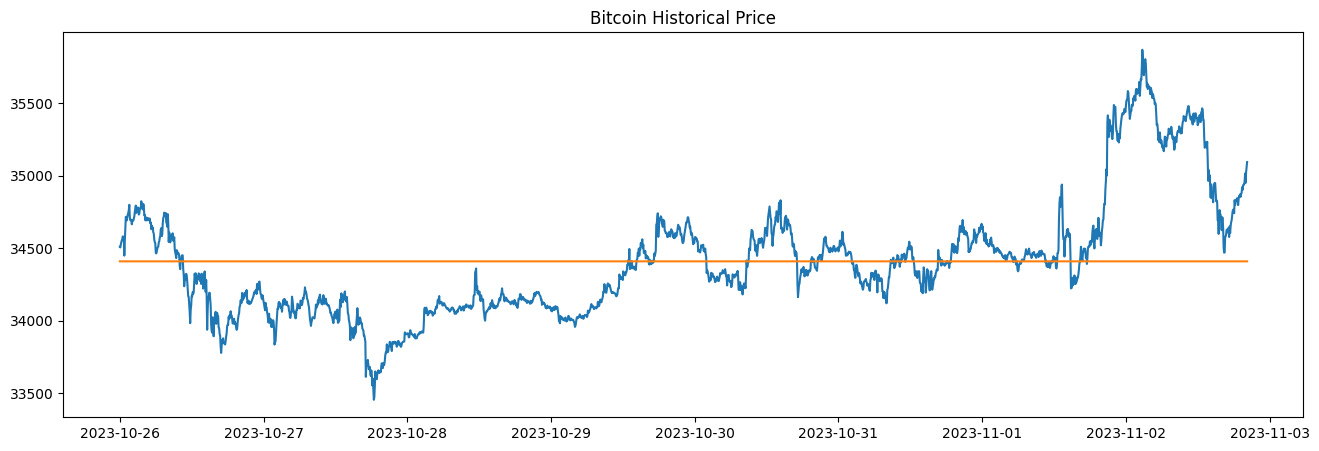

In [ ]:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  take_decision()
  visualizacion()
  time.sleep(300)